# VotingClassifier

Accuracy VotingClassifier: 0.9594202898550724
Classification Report VotingClassifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       739
           1       0.89      0.98      0.93       296

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



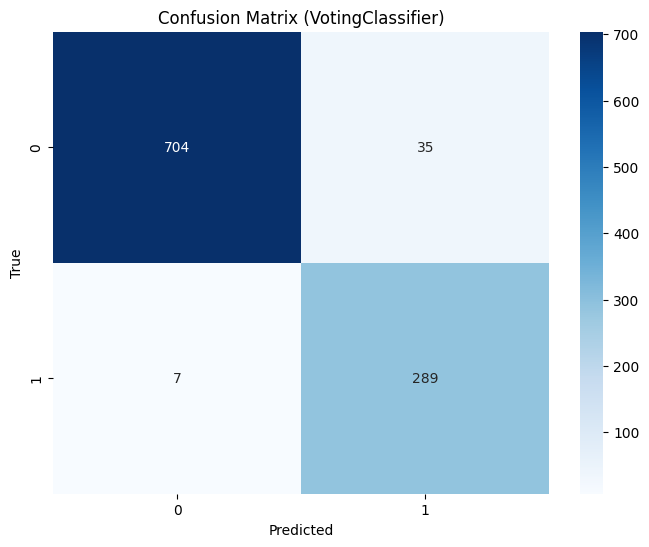

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'Prediction' is the target column
df = pd.read_csv('emails.csv')

# Drop 'Email No.' column
df = df.drop(['Email No.'], axis=1)

# Selecting features (excluding 'Prediction' and other unwanted columns)
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

# Ensure the data does not contain any missing values
if X.isnull().values.any():
    raise ValueError("Dataset contains missing values. Please handle them before proceeding.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()

# Selecting only numeric columns for training
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]

# Create an ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('nb', nb_model)], voting='soft')
ensemble_model.fit(X_train_numeric, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy VotingClassifier: {accuracy}')
print(f'Classification Report VotingClassifier:\n{classification_rep}')

# Calculate the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.title('Confusion Matrix (VotingClassifier)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# KNN

Accuracy (KNN): 0.8023630504833512
Classification Report KNN:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      3321
           1       0.63      0.75      0.69      1334

    accuracy                           0.80      4655
   macro avg       0.76      0.79      0.77      4655
weighted avg       0.82      0.80      0.81      4655



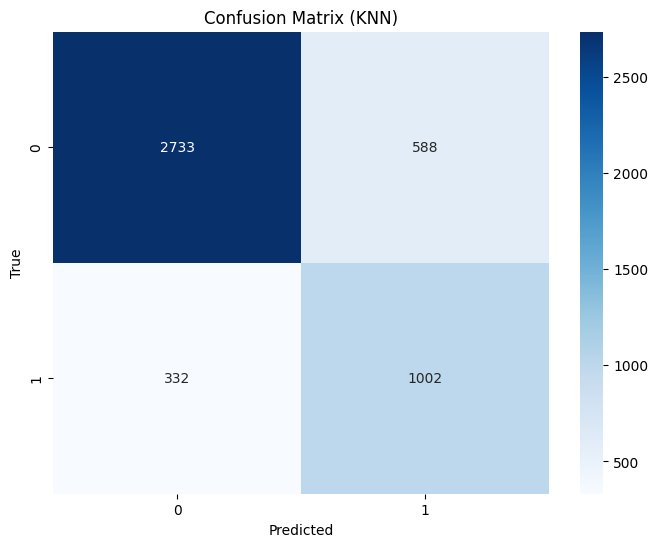

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Prediction' is the target column
df = pd.read_csv('emails.csv')

# Drop 'Email No.' column
df = df.drop(['Email No.'], axis=1)

# Selecting features (excluding 'Prediction' and other unwanted columns)
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

# Ensure the data does not contain any missing values
if X.isnull().values.any():
    raise ValueError("Dataset contains missing values. Please handle them before proceeding.")

# Split the data with a very small training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the k-Nearest Neighbors model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy (KNN): {accuracy}')
print(f'Classification Report KNN:\n{classification_rep}')

# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix for k-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# NB

Accuracy (GaussianNB): 0.9364124597207304
Classification Report GaussianNB:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3321
           1       0.87      0.91      0.89      1334

    accuracy                           0.94      4655
   macro avg       0.92      0.93      0.92      4655
weighted avg       0.94      0.94      0.94      4655



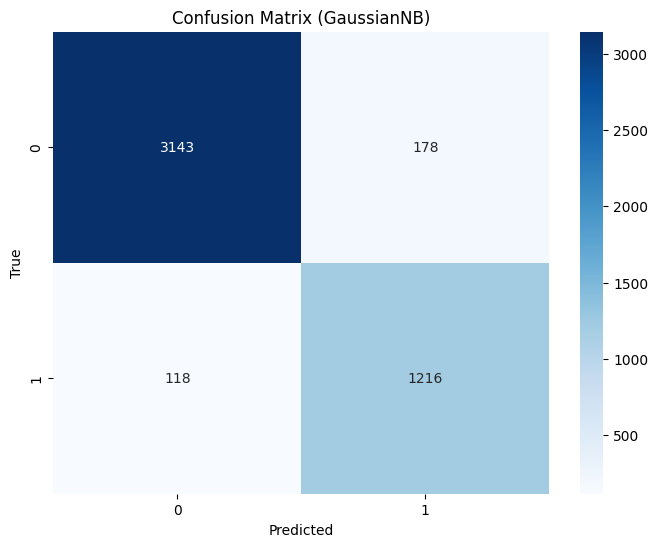

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Prediction' is the target column
df = pd.read_csv('emails.csv')

# Drop 'Email No.' column
df = df.drop(['Email No.'], axis=1)

# Selecting features (excluding 'Prediction' and other unwanted columns)
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

# Ensure the data does not contain any missing values
if X.isnull().values.any():
    raise ValueError("Dataset contains missing values. Please handle them before proceeding.")

# Split the data with a very small training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred = gnb_model.predict(X_test)

# Evaluate the Gaussian Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy (GaussianNB): {accuracy}')
print(f'Classification Report GaussianNB:\n{classification_rep}')

# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_model.classes_, yticklabels=gnb_model.classes_)
plt.title('Confusion Matrix (GaussianNB)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# RF

Accuracy (Random Forest): 0.9368421052631579
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3321
           1       0.91      0.87      0.89      1334

    accuracy                           0.94      4655
   macro avg       0.93      0.92      0.92      4655
weighted avg       0.94      0.94      0.94      4655



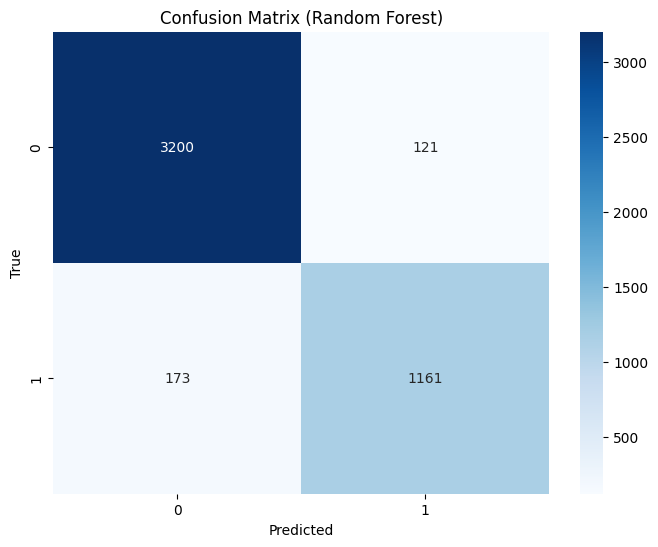

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Prediction' is the target column
df = pd.read_csv('emails.csv')

# Drop 'Email No.' column
df = df.drop(['Email No.'], axis=1)

# Selecting features (excluding 'Prediction' and other unwanted columns)
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

# Ensure the data does not contain any missing values
if X.isnull().values.any():
    raise ValueError("Dataset contains missing values. Please handle them before proceeding.")

# Split the data with a very small training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy (Random Forest): {accuracy}')
print(f'Classification Report Random Forest:\n{classification_rep}')

# Calculate the confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# COMPARATIVE STUDY

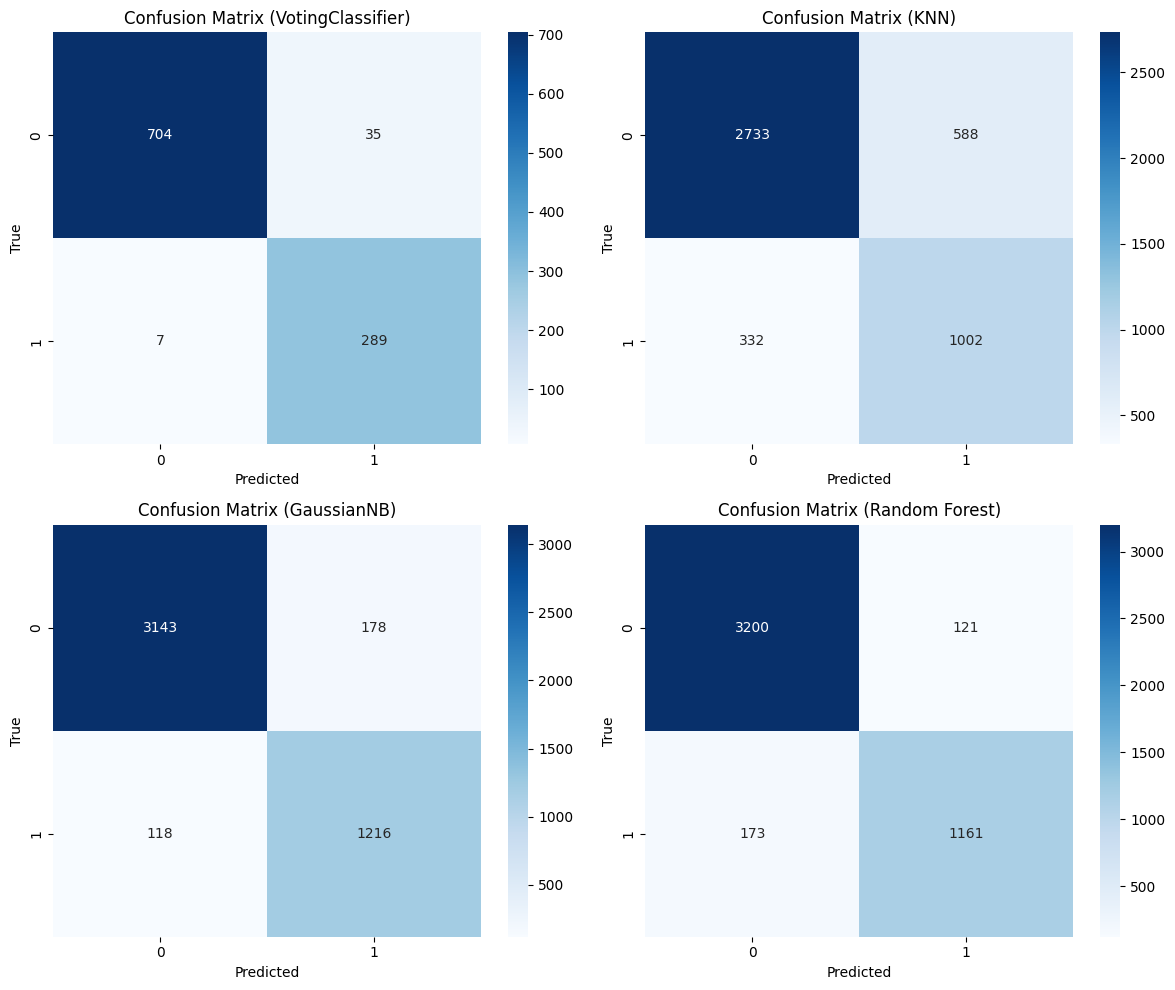

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming conf_matrices is a list containing confusion matrices for different models
conf_matrices = [conf_matrix1, conf_matrix2, conf_matrix3, conf_matrix4]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of models for labels
model_labels = ['VotingClassifier', 'KNN', 'GaussianNB', 'Random Forest']

# Loop through each model's confusion matrix
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Confusion Matrix ({model_labels[i]})')
    axes.flatten()[i].set_xlabel('Predicted')
    axes.flatten()[i].set_ylabel('True')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


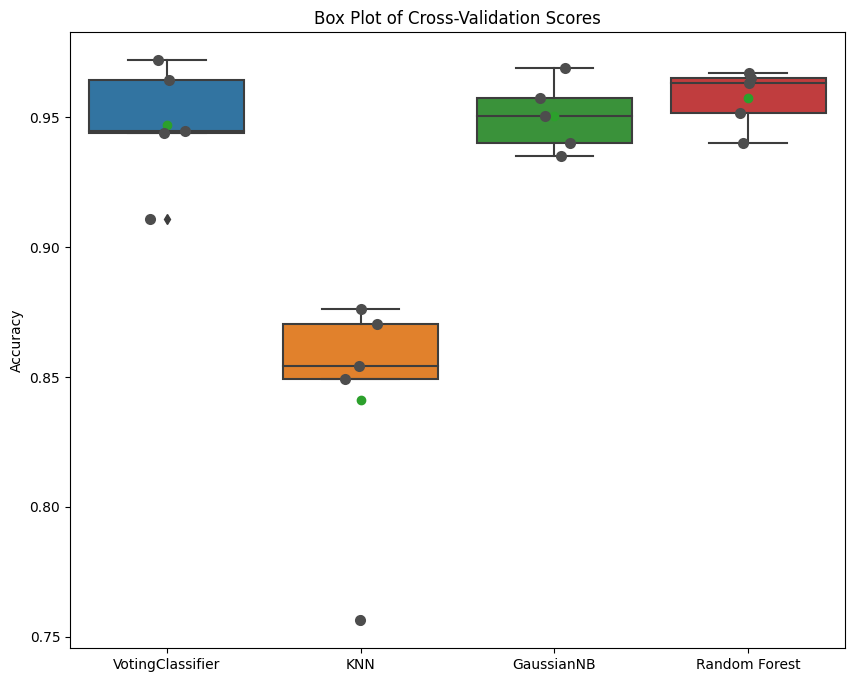

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

# Assuming you have defined models
models = [ensemble_model, knn_model, gnb_model, rf_model]

# List of models for labels
model_labels = ['VotingClassifier', 'KNN', 'GaussianNB', 'Random Forest']

# Calculate cross-validation scores for each model
cv_scores = [cross_val_score(model, X, y, cv=5, scoring='accuracy') for model in models]

# Flatten the list of arrays
flat_cv_scores = np.concatenate(cv_scores)

# Create labels for boxplot
labels = np.repeat(model_labels, [len(scores) for scores in cv_scores])

# Box plot with strip plot
plt.figure(figsize=(10, 8))
sns.boxplot(x=labels, y=flat_cv_scores, showmeans=True, meanprops={"marker":"o"})
sns.stripplot(x=labels, y=flat_cv_scores, jitter=True, color=".3", size=8)
plt.title('Box Plot of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()
